In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


data_root = '../data'
small_corpus_scored = f'{data_root}/small_corpus_scored.csv'

labels = ['negative', 'neutral', 'positive']

In [2]:
def add_ratings_class(df):
    df['ratings_class'] = df['ratings'].apply(
        lambda x: 'positive' if x >=5 else ('negative' if x <= 1 else 'neutral')
    )

In [3]:
def add_score_class(df):
    df['score_class'] = df['score'].apply(
        lambda x: 'positive' if x > 0.2 else ('negative' if x < -0.2 else 'neutral')
    )

In [9]:
def accuracy_precision_recall(y_true, y_pred):
    print(f'Accuracy score: {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision score: {precision_score(y_true, y_pred, average="weighted"):.2f}')
    print(f'Recall score: {recall_score(y_true, y_pred, average="weighted"):.2f}')
    print()

In [5]:
def calculate_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    print("Confusion matrix")
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot()
    plt.show()

In [6]:
df = pd.read_csv(small_corpus_scored)
add_ratings_class(df)
add_score_class(df)

y_true = df['ratings_class']
y_pred = df['score_class']

* accuracy - number of correctly classified reviews
* precision - for a given score (i.e. prediction) class, percentage of correctly classified reviews. Important if the costs of a false positive (e.g spam) are high
* recall - for given ratings (i.e. ground truth) class, percentage of correctly classified reviews Important if the costs of a false negative (e.g fraud, disease) are high
* 1 score - harmonic mean of precision and recall

In [10]:
accuracy_precision_recall(y_true, y_pred)

Accuracy score: 0.39
Precision score: 0.64
Recall score: 0.39



In [11]:
print(classification_report(y_true, y_pred, labels=labels))


              precision    recall  f1-score   support

    negative       0.75      0.03      0.06      1500
     neutral       0.35      0.95      0.51      1500
    positive       0.81      0.20      0.32      1500

    accuracy                           0.39      4500
   macro avg       0.64      0.39      0.30      4500
weighted avg       0.64      0.39      0.30      4500



* Ground truth in rows, predictions in columns

Confusion matrix
[[  49 1442    9]
 [  16 1421   63]
 [   0 1201  299]]


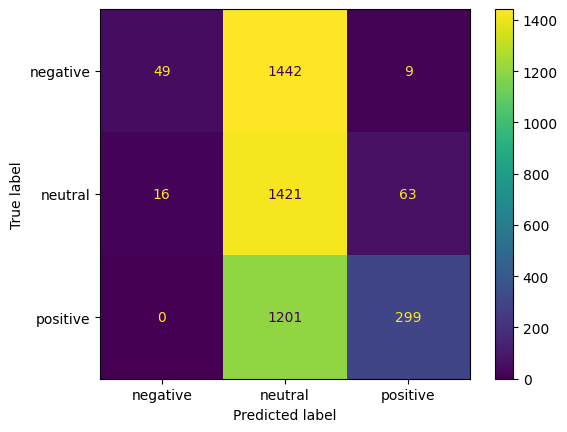

In [12]:
calculate_confusion_matrix(y_true, y_pred)

We can see the problem.
Those that are classified negative are generally negative
Those that are classified positive are generally positive
But most reviews have been classified as neutral, even many
that were positive os negative